# Восстановление золота из руды <a id='intro'></a>

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных из файла
Импортируем библиотеки, с которыми будем работать

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor

import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Сохраним каждую выборку в отдельную переменную:
* `df_train`
* `df_test`
* `df_full`

При этом сделаем преобразование - в качестве индексов в каждом датафрейме возьмем столбец "Дата", формат даты поменяем с помощью `parse_dates = True`

In [2]:
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv', index_col = 'date', parse_dates = True)
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col = 'date', parse_dates = True)
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
try:
    df_test = pd.read_csv('gold_recovery_test_new.csv', index_col = 'date', parse_dates = True)
except:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col = 'date', parse_dates = True)
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
try:
    df_full = pd.read_csv('gold_recovery_full_new.csv', index_col = 'date', parse_dates = True)
except:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col = 'date', parse_dates = True)
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посмотрим общую информацию по каждой выборке.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей и нет целевых признаков. В каждой из выборок есть пропущенные значения.

### Проверка правильности расчёта эффективности обогащения

Проверим правильность расчёта эффективности обогащения по предоставленной формуле. Для расчёта используем следующие параметры:
* С - доля золота в концентрате после флотаци/очистки,
* F - доля золота в сырье/концентрате до флотации/ очистки,
* Т - доля золота в отвальных хвостах после флотации/очистки.

In [8]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [9]:
recovery = ((C * (F - T)) / (F * (C - T))) * 100

In [10]:
print('MAE:', mean_absolute_error(df_train['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


Значение МАЕ стремится к нулю - ошибка незначительная, эффективность обогащения рассчитана корректно.

### Анализ признаков

Проанализируем признаки, недоступные в тестовой выборке. 

In [11]:
print(df_train.shape)
print(df_test.shape)

(14149, 86)
(5290, 52)


In [12]:
cols_to_drop = list(set(df_train) - set(df_test))
display(cols_to_drop)
print('Количество признаков, отсутствующих в тестовой выборке:', len(cols_to_drop))

['primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'final.output.tail_sol',
 'final.output.recovery',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_au',
 'rougher.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_au',
 'final.output.tail_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_pb',
 'rougher.output.tail_ag',
 

Количество признаков, отсутствующих в тестовой выборке: 34


В список вошли два целевых признака, оставим их в обучающей выборке.

In [13]:
cols_to_drop.remove('rougher.output.recovery')
cols_to_drop.remove('final.output.recovery')
display(cols_to_drop)
print('Количество признаков, отсутствующих в тестовой выборке:', len(cols_to_drop))

['primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'final.output.tail_sol',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_pb',
 'rougher.output.tail_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_au',
 'rougher.output.concentrate_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_au',
 'final.output.tail_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_pb',
 'rougher.output.tail_ag',
 'final.output.tail_ag',
 'secondary_cleaner.output.tai

Количество признаков, отсутствующих в тестовой выборке: 32


**В тестовой выборке 52 признака, а в обучающей 86. В тестовой выборке отсутствуют параметры, которые замеряются и/или рассчитываются значительно позже. Также отсутствуют целевые признаки `rougher.output.recovery` и `final.output.recovery`. Все отсутствующие признаки имеют числовой тип данных - float64.**

Удалим из обучающей выборки признаки, которых нет в тестовой выборке.

In [14]:
df_train = df_train.drop(cols_to_drop, 1)
display(df_train)

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


Убедимся, что после удаления столбцов, размеры обучающей и тестовой выборки отличаются только на два целевых признака.

In [15]:
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(14149, 54)
(5290, 52)
(19439, 86)


### Предобработка данных

Посмотрим на количество пропущенных значений в выборках.

In [16]:
df_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [17]:
df_train.isna().sum()

final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29


In [18]:
df_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Предположим, что соседние значения не сильно отличаются, заполним пропуски во всех трех выборках методом ffill.

In [19]:
df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

### Вывод

В ходе подготовки данных мы:
* проверили правильность рассчёта эффективности обогащения,
* удалили столбцы из обучающей выборки, которых нет в тестовой,
* заполнили пропущенные значения.

## Анализ данных

Посмотрим, как меняется концентрация золота, серебра и свинца на различных этапах очистки.

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Построим гистограмму "Концентрация золота на различных этапах очистки".

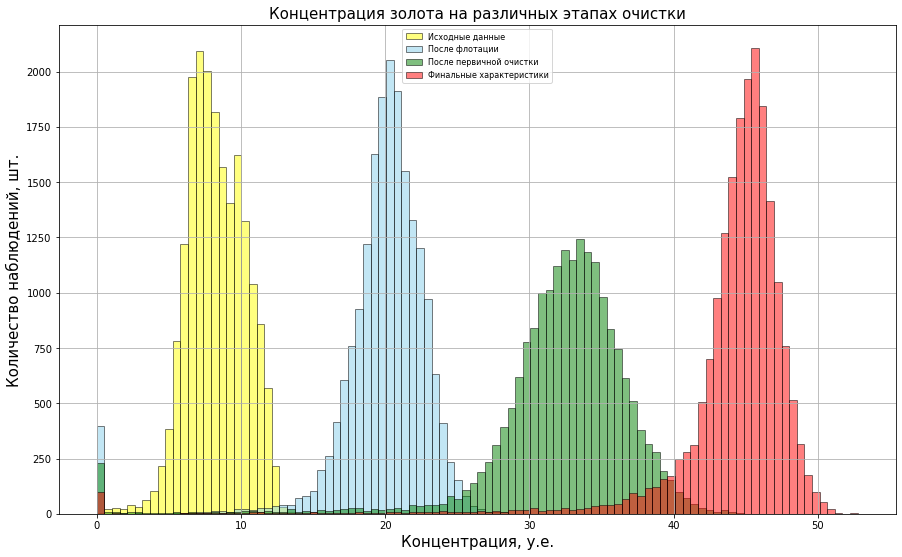

In [20]:
df_full[['rougher.input.feed_au', 
         'rougher.output.concentrate_au',
         'primary_cleaner.output.concentrate_au',
         'final.output.concentrate_au']].plot(kind='hist', 
                                              alpha=.5, 
                                              figsize=(15, 9),
                                              grid=True, 
                                              bins=100, 
                                              color=["yellow", "skyblue", "green", "red"], 
                                              edgecolor="black")
plt.title('Концентрация золота на различных этапах очистки', fontsize=15, y=1)
plt.xlabel('Концентрация, у.е.', fontsize=15)
plt.ylabel('Количество наблюдений, шт.', fontsize=15)
plt.legend(['Исходные данные', 'После флотации', 'После первичной очистки', 'Финальные характеристики'], loc = 9, fontsize = 8)
plt.show()

На графике  видим, что на каждом этапе очиски концентрация золота увеличивается.

Построим гистограмму "Концентрация серебра на различных этапах очистки".

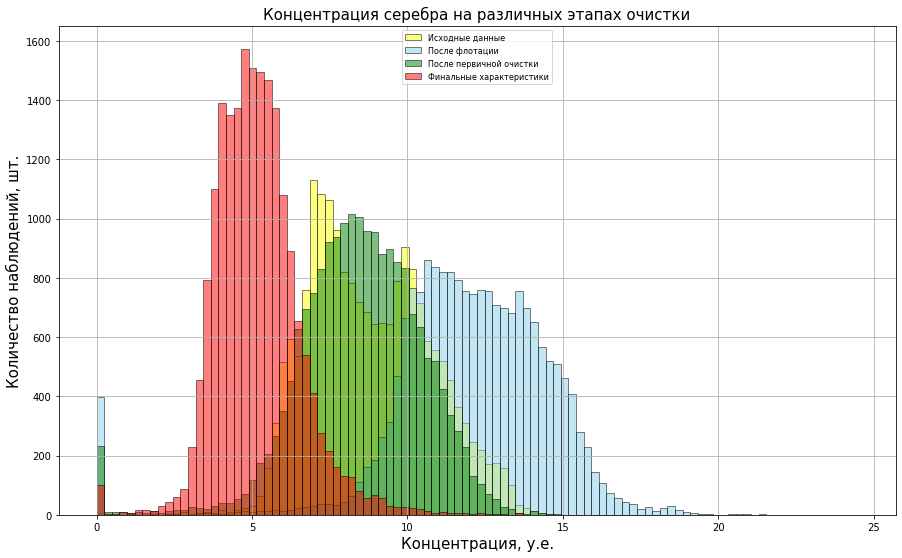

In [21]:
df_full[['rougher.input.feed_ag', 
         'rougher.output.concentrate_ag',
         'primary_cleaner.output.concentrate_ag',
         'final.output.concentrate_ag']].plot(kind='hist', 
                                              alpha=.5, 
                                              figsize=(15, 9),
                                              grid=True, 
                                              bins=100, 
                                              color=["yellow", "skyblue", "green", "red"], 
                                              edgecolor="black")
plt.title('Концентрация серебра на различных этапах очистки', fontsize=15, y=1)
plt.xlabel('Концентрация, у.е.', fontsize=15)
plt.ylabel('Количество наблюдений, шт.', fontsize=15)
plt.legend(['Исходные данные', 'После флотации', 'После первичной очистки', 'Финальные характеристики'], loc = 9, fontsize = 8)
plt.show()

На графике видим, что финальная концентрация серебра самая низкая. При этом после флотации концентрация серебра выше, чем в исходных данных.

Построим гистограмму "Концентрация свинца на различных этапах очистки".

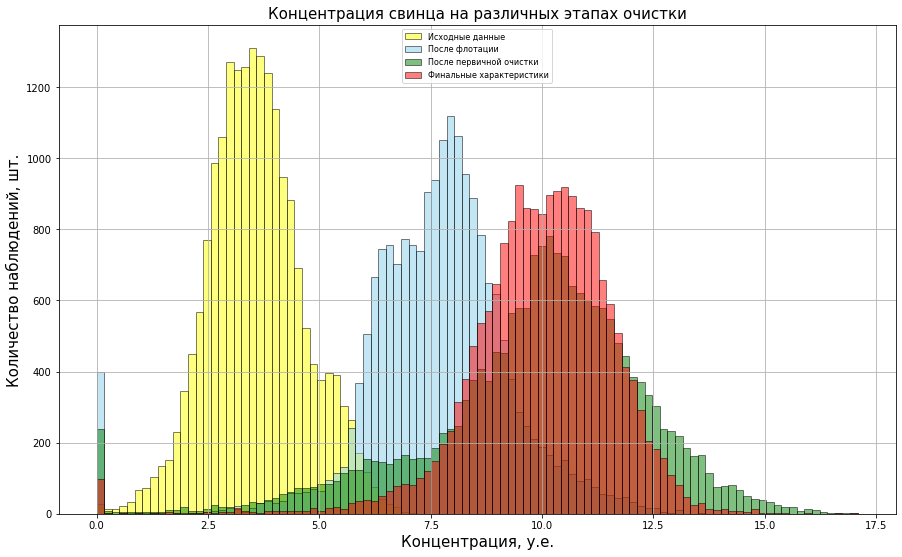

In [22]:
df_full[['rougher.input.feed_pb', 
         'rougher.output.concentrate_pb',
         'primary_cleaner.output.concentrate_pb',
         'final.output.concentrate_pb']].plot(kind='hist', 
                                              alpha=.5, 
                                              figsize=(15, 9),
                                              grid=True, 
                                              bins=100, 
                                              color=["yellow", "skyblue", "green", "red"], 
                                              edgecolor="black")
plt.title('Концентрация свинца на различных этапах очистки', fontsize=15, y=1)
plt.xlabel('Концентрация, у.е.', fontsize=15)
plt.ylabel('Количество наблюдений, шт.', fontsize=15)
plt.legend(['Исходные данные', 'После флотации', 'После первичной очистки', 'Финальные характеристики'], loc = 9, fontsize = 8)
plt.show()

На графике видно, что концентрация свинца после первичной очистки и в финальных характеристиках практически не меняется.

По построенным гистограммам можем сделать вывод, что концентрация разных металлов отличается на различных этапах очистки.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Для правильной оценки модели необходимо, чтобы распределения размеров гранул сырья на обучающей и тестовой выборках не сильно отличались. Чтобы сравнить распределения, построим истограммы.

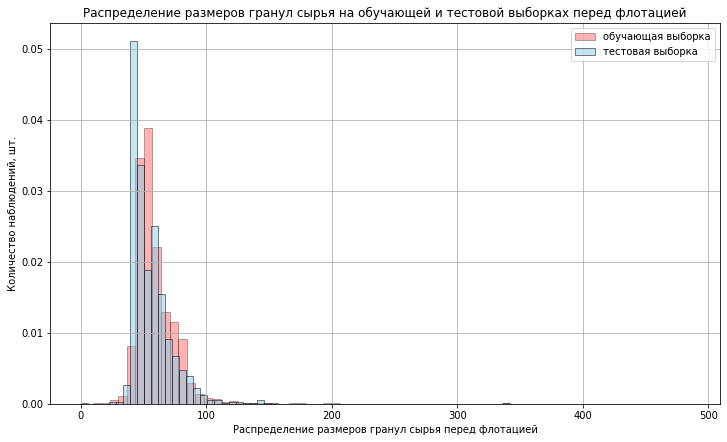

In [23]:
fig = plt.figure(figsize = (12, 7))

df_train['rougher.input.feed_size'].plot(
    kind='hist',
    density=True,
    alpha=.3,
    grid=True,
    bins=70,
    color="red",
    edgecolor="black")

df_test['rougher.input.feed_size'].plot(
    kind='hist',
    density=True,
    alpha=.5,
    grid=True,
    bins=70,
    color="skyblue",
    edgecolor="black")

plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках перед флотацией', fontsize=12, y=1)
plt.xlabel('Распределение размеров гранул сырья перед флотацией')
plt.ylabel('Количество наблюдений, шт.')
plt.legend(['обучающая выборка', 'тестовая выборка'], loc=1)
plt.show()

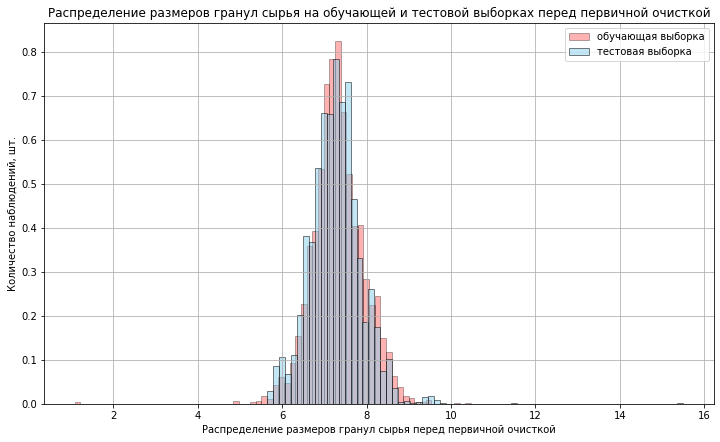

In [24]:
fig = plt.figure(figsize = (12, 7))

df_train['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    density=True,
    alpha=.3,
    grid=True,
    bins=70,
    color="red",
    edgecolor="black")

df_test['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    density=True,
    alpha=.5,
    grid=True,
    bins=70,
    color="skyblue",
    edgecolor="black")

plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках перед первичной очисткой', fontsize=12, y=1)
plt.xlabel('Распределение размеров гранул сырья перед первичной очисткой')
plt.ylabel('Количество наблюдений, шт.')
plt.legend(['обучающая выборка', 'тестовая выборка'], loc=1)
plt.show()

На полученных графиках мы видим, что распределения отличаются не сильно, на оценку модели различия не должны повлиять.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Посчитаем суммарную концентрацию веществ (золото, серебро, свинец, соль) в исходном сырье

In [25]:
df_full['rougher_feed'] = (df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + 
                           df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol'])

df_full['rougher_feed'].describe()

count    19439.000000
mean        57.320789
std          7.212680
min          0.040000
25%         53.557679
50%         57.594391
75%         61.953459
max         76.978947
Name: rougher_feed, dtype: float64

Посчитаем суммарную концентрацию веществ (золото, серебро, свинец, соль) в черновом концентрате

In [26]:
df_full['rougher_total'] = (df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + 
                            df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'])
df_full['rougher_total'].describe()

count    19439.000000
mean        68.170865
std         12.491279
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
Name: rougher_total, dtype: float64

Посчитаем суммарную концентрацию веществ (золото, серебро, свинец, соль) в финальном концентрате

In [27]:
df_full['final_total'] = (df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + 
                          df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'])
df_full['final_total'].describe() 

count    19439.000000
mean        68.653624
std          7.427536
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
Name: final_total, dtype: float64

Построим гистограмму и посмотрим на распределение суммарной концентрации веществ на разных стадиях.

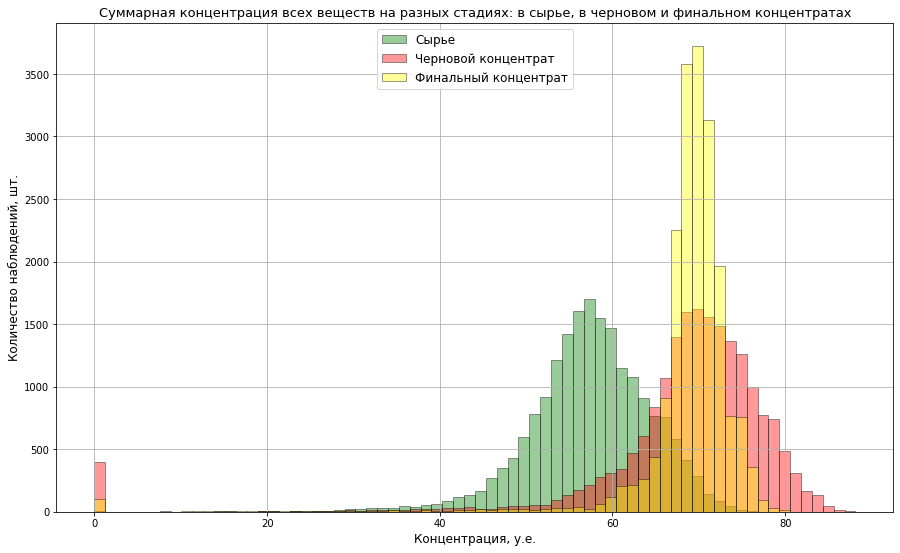

In [28]:
df_full[['rougher_feed', 
         'rougher_total',
         'final_total']].plot(kind='hist', 
                              alpha=.4, 
                              figsize=(15, 9), 
                              grid=True,
                              bins=70,
                              color=["green", "red", "yellow"],
                              edgecolor="black")
plt.title('Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах', 
          fontsize=13, y=1)
plt.xlabel('Концентрация, у.е.', fontsize=12)
plt.ylabel('Количество наблюдений, шт.', fontsize=12)
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'], loc = 9, fontsize = 12)
plt.show()

На графике видим суммарную концентрацию, равную нулю. Удалим в каждой выборке те позиции, у которых суммарная концентрация на какой-либо стадии равна нулю, чтобы такие данные не оказывали негативного влияния на качество модели.

In [29]:
str_to_drop = df_full[(df_full['rougher_feed'] == 0) | 
    (df_full['rougher_total'] == 0) | 
    (df_full['final_total'] == 0)].index
str_to_drop

DatetimeIndex(['2016-01-16 21:00:00', '2016-01-16 22:00:00',
               '2016-01-16 23:00:00', '2016-01-17 00:00:00',
               '2016-01-17 02:00:00', '2016-01-17 03:00:00',
               '2016-01-17 04:00:00', '2016-02-13 11:00:00',
               '2016-02-18 20:00:00', '2016-03-11 10:00:00',
               ...
               '2018-02-11 00:59:59', '2018-02-11 01:59:59',
               '2018-02-11 20:59:59', '2018-02-11 21:59:59',
               '2018-02-11 22:59:59', '2018-02-11 23:59:59',
               '2018-02-12 00:59:59', '2018-02-12 01:59:59',
               '2018-02-12 02:59:59', '2018-02-12 03:59:59'],
              dtype='datetime64[ns]', name='date', length=490, freq=None)

In [30]:
df_full.shape

(19439, 89)

In [31]:
df_full = df_full.query('date not in @str_to_drop')
df_full.shape

(18949, 89)

In [32]:
df_train.shape

(14149, 54)

In [33]:
df_train = df_train.query('date not in @str_to_drop')
df_train.shape

(13795, 54)

In [34]:
df_test.shape

(5290, 52)

In [35]:
df_test = df_test.query('date not in @str_to_drop')
df_test.shape

(5154, 52)

Всего было 490 случаев нулевой концентрации, из них 354 в обучающей выборке и 136 в тестовой. Мы подготовили данные, теперь можем строить модели.

### Вывод

Мы провели анализ изменения концентрации металлов на различных этапах очистки: 
* после каждого этапа очистки доля золота в концентрате увеличивается,
* доля серебра уменьшается,
* доля свинца практически не меняется на фильнальных этапах очистки.

Сравнительный анализ распределения гранул сырья на обучающей и тестовой выборках показывает незначительные отличия, которые не виляют на правильность оценки модели.

Мы исследовали суммарную концентрацию всех веществ на разных стадиях процесса и удалили найденные нулевые значения из всех выборок, чтобы исключить их влияние на качество модели.

## Модель

### Функция для вычисления итоговой sMAPE

Напишем функцию для вычисления итоговой sMAPE

In [36]:
def smape(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = (np.abs(target) + np.abs(target)) / 2 
    smape = 1 / len(target) * np.sum(numerator / denominator) * 100
    return smape

In [37]:
def final_smape (smape_rougher, smape_final):
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

Нам нужно построить модель для задачи регрессии. Выделим для тестовой выборки целевые признаки из общей выборки по индексам (датам).

In [38]:
target_test = df_full[['rougher.output.recovery', 'final.output.recovery']].loc[df_test.index]
target_test

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


Составим таблицы признаков и целевых признаков для каждой выборки.

In [39]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

features_test = df_test
target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

Приведём численные признаки к одному масштабу.

In [40]:
numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_test.shape)

(13795, 52)
(5154, 52)


Для решения задачи регрессии обучим несколько моделей:
* модель линейной регрессии,
* модель решающего дерева, 
* модель случайного леса.

### Модель линейной регрессии

Для оценки качества модели линейной регрессии используем кросс-валидацию.

In [41]:
%%time

scorer = make_scorer(smape, greater_is_better=False) 

cross_val_score_rougher = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_train_rougher,
                                          cv=5, scoring=scorer).mean()
cross_val_score_final = cross_val_score(LinearRegression(),
                                        features_train,
                                        target_train_final,
                                        cv=5, scoring=scorer).mean()

total_smape_lr = final_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE для модели линейной регрессии:', total_smape_lr)

Итоговое sMAPE для модели линейной регрессии: -13.852265036523313
CPU times: user 1.39 s, sys: 1.52 s, total: 2.91 s
Wall time: 2.94 s


### Модель решающего дерева

In [42]:
%%time

# задаем параметры для модуля GridSearch 
param_grid = {
 'max_depth': [1, 10],
 'min_samples_split': [8, 10, 12],
 }

# инициализируем модель
dt_reg = DecisionTreeRegressor(random_state=12345)

# ищем лучшие параметры 
grid_rougher = GridSearchCV(estimator = dt_reg, param_grid = param_grid, cv= 5, n_jobs = -1, scoring=scorer) 
grid_final = GridSearchCV(estimator = dt_reg, param_grid = param_grid, cv= 5, n_jobs = -1, scoring=scorer) 

# обучаем модель на тренировочных данных
grid_rougher.fit(features_train, target_train_rougher)
grid_final.fit(features_train, target_train_final)

# получаем лучшие параметры модели
print('Лучшие параметры модели решающего дерева для чернового концентрата:', grid_rougher.best_params_)
print('Лучшие параметры модели решающего дерева для финального концентрата:', grid_final.best_params_)
print()

# получаем лучшие оценки 
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
print('Лучшая оценка для чернового концентрата:', best_score_rougher)
print('Лучшая оценка для финального концентрата:', best_score_final)
print()

# считаем итоговую оценку
total_smape_dt = final_smape(best_score_rougher,best_score_final)
print('Итоговое sMAPE для модели дерева решений:', total_smape_dt)
print()

Лучшие параметры модели решающего дерева для чернового концентрата: {'max_depth': 1, 'min_samples_split': 8}
Лучшие параметры модели решающего дерева для финального концентрата: {'max_depth': 1, 'min_samples_split': 8}

Лучшая оценка для чернового концентрата: -8.811219775788055
Лучшая оценка для финального концентрата: -16.180100073280048

Итоговое sMAPE для модели дерева решений: -14.33787999890705

CPU times: user 16.2 s, sys: 0 ns, total: 16.2 s
Wall time: 17.2 s


### Модель случайного леса

In [43]:
%%time

# задаем параметры для модуля GridSearch 
param_grid = {
 'max_depth': [1, 10],
 'max_features': [2, 3],
 'min_samples_leaf': [3,4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [100, 200]
}

# инициализируем модель
forest_reg = RandomForestRegressor(random_state=12345)

# ищем лучшие параметры 
grid_rougher = GridSearchCV(estimator = forest_reg, param_grid = param_grid, cv= 5, n_jobs = -1, scoring=scorer) 
grid_final = GridSearchCV(estimator = forest_reg, param_grid = param_grid, cv= 5, n_jobs = -1, scoring=scorer) 

# обучаем модель на тренировочных данных
grid_rougher.fit(features_train, target_train_rougher)
grid_final.fit(features_train, target_train_final)

# получаем лучшие параметры модели
print('Лучшие параметры модели случайного леса для чернового концентрата:', grid_rougher.best_params_)
print('Лучшие параметры модели случайного леса для финального концентрата:', grid_final.best_params_)
print()

# получаем лучшие оценки 
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
print('Лучшая оценка для чернового концентрата:', best_score_rougher)
print('Лучшая оценка для финального концентрата:', best_score_final)
print()

# считаем итоговую оценку
total_smape_rf = final_smape(best_score_rougher,best_score_final)
print('Итоговое sMAPE для модели случайного леса:', total_smape_rf)
print()

Лучшие параметры модели случайного леса для чернового концентрата: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Лучшие параметры модели случайного леса для финального концентрата: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Лучшая оценка для чернового концентрата: -6.484783706998057
Лучшая оценка для финального концентрата: -14.425025709869484

Итоговое sMAPE для модели случайного леса: -12.439965209151627

CPU times: user 17min 14s, sys: 2.53 s, total: 17min 16s
Wall time: 17min 20s


Модели линейной регрессии и решающего дерева получили итоговые оценки -13,85 и -14,34 соответственно. Лучшее значение итоговое sMAPE у модели случайного леса - 12,44.  
Проверим модель на тестовой выборке.

### Тестирование модели

Протестируем модель случайного леса со следующими параметрами:
1. для чернового концентрата:
    * max_depth = 10
    * max_features = 3
    * min_samples_leaf = 3
    * min_samples_split = 8
    * n_estimators = 200  
   
   
2. для финального концентрата:
    * max_depth = 10
    * max_features = 3
    * min_samples_leaf = 3
    * min_samples_split = 10
    * n_estimators = 200

In [44]:
%%time

# инициализируем модель для чернового концентрата
model_rougher = RandomForestRegressor(random_state=12345, 
                                      max_depth=10, 
                                      max_features = 3, 
                                      min_samples_leaf = 3, 
                                      min_samples_split = 8, 
                                      n_estimators = 200)

# # инициализируем модель для финального концентрата
model_final = RandomForestRegressor(random_state=12345, 
                                    max_depth=10, 
                                    max_features = 3, 
                                    min_samples_leaf = 3, 
                                    min_samples_split = 10, 
                                    n_estimators = 200)

# обучаем модель на тренировочных данных
model_rougher.fit(features_train, target_train_rougher)
model_final.fit(features_train, target_train_final)

# находим предсказания на тестовой выборке
rougher_test = model_rougher.predict(features_test)
final_test = model_final.predict(features_test)

# оцениваем модель
smape_rougher = smape(target_test_rougher, rougher_test)
smape_final = smape(target_test_final, final_test)

# получаем итоговую оценку модели
total_smape_rf = final_smape(smape_rougher, smape_final)
print('Итоговое sMAPE для модели случайного леса на тестовой выборке:', total_smape_rf)
print()

Итоговое sMAPE для модели случайного леса на тестовой выборке: 7.845718056359859

CPU times: user 9.11 s, sys: 52 ms, total: 9.16 s
Wall time: 9.17 s


Итоговая оценка модели на тестовой выборке 7,85 почти в два раза лучше, чем на тренировочной. Проверим модель на адекватность с помощью константной модели DummyRegressor.

In [45]:
%%time

# инициализируем модель
const_rougher = DummyRegressor(strategy='median')
const_final = DummyRegressor(strategy='median')

# обучаем модель на тренировочных данных
const_rougher.fit(features_train, target_train_rougher)
const_final.fit(features_train, target_train_final)

# находим предсказания на тестовой выборке
pred_const_rougher = const_rougher.predict(features_test)
pred_const_final = const_final.predict(features_test)

# оцениваем модель
smape_const_rougher = smape(target_test_rougher, pred_const_rougher)
smape_const_final = smape(target_test_final, pred_const_final)

# получаем итоговую оценку модели
total_smape_const = final_smape(smape_const_rougher, smape_const_final)
print('Итоговое sMAPE для константной модели:', total_smape_const)
print()

Итоговое sMAPE для константной модели: 8.3886734911095

CPU times: user 5.92 ms, sys: 5 µs, total: 5.93 ms
Wall time: 4.64 ms


Оценка константной модели хуже, чем оценка модели случайного леса на тестовых данных, проверка на адекватность успешная.

### Вывод

Мы написали функцию для вычисления итоговой sMAPE. Обучили разные модели с использованием кросс-валидации и подбором гиперпараметров GridSearch. Лучший результат показывает модель случайного леса. Обученная на тестовой выборке модель случайного леса предсказывает с меньшими ошибками, чем константная модель, значит модель адекватна.

## Общий вывод

Объект нашего исследования - данные с параметрами добычи и очистки золотосодержащей руды.

В ходе предобработки мы подготовили данные к моделированию:
* проверили правильность рассчёта эффективности обогащения,
* удалили столбцы из обучающей выборки, которых нет в тестовой,
* заполнили пропущенные значения 

Для решения поставленной задачи мы провели анализ данных:
1. Посмотрели как меняется концентрация металлов (золото, серебро, свинец) на разных этапах очистки:
    * после каждого этапа очистки доля золота в концентрате увеличивается,
    * доля серебра уменьшается,
    * доля свинца практически не меняется на фильнальных этапах очистки. 
2. Сравнили распределение размеров гранул сырья на обучающей и тестовой выборках. Распределения отличаются незначительно и не влияют на оценку модели.
3. Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. По результатам исследования удалили найденные нулевые значения из всех выборок, чтобы исключить их влияние на качество модели.

Мы написали функцию для вычисления метрики итоговое sMAPE. Обучили и проверили три модели:
* модель линейной регрессии,
* модель решающего дерева, 
* модель случайного леса.

Самые точные предсказания получили с помощью модели случайного леса. Итоговое sMAPE на тестовой выборке: 7,85. Константная модель оказалась хуже, итоговое sMAPE: 8,39. 

Подведём итог нашей работы - рекомендация для компании "Цифра":
* обратить внимание на данные о нулевой концентрации металлов, возможно это следствие ошибки сбора данных или же особенности технологического процесса;
* для предсказания коэффициента восстановления золота из золотосодержащей руды использовать модель случайного леса с характеристиками:

    1. для чернового концентрата:
        * max_depth = 10
        * max_features = 3
        * min_samples_leaf = 3
        * min_samples_split = 8
        * n_estimators = 200  
      
    2. для финального концентрата:
        * max_depth = 10
        * max_features = 3
        * min_samples_leaf = 3
        * min_samples_split = 10
        * n_estimators = 200       